In [130]:
#Importing libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [70]:
# Reding the actual data
df = pd.read_csv("Country-data.csv")

In [71]:
#Viewing the data sets
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Understanding the data

In [72]:
#Lets see them statistical info about our data i.e mean , median, Std etc
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [73]:
# The shape of the data is 
df.shape

(167, 10)

In [74]:
# Lets check for Null values and the type of each column
df.info()
#All of our values are numerical in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [75]:
df.isnull().sum()# No Null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [76]:
# As we have a country column so we do not need to add extra column for recognizing the rows , which 
# is generally done using an ID column is clustering problems
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### EDA

We Know following things from data dictionary.
1. Exports, Imports and health is as %age of the GDP per capita
2. We need to convert above three into absolute values for during clustering because the percentage values don't give a clear picture of that country

In [77]:
#Converting exports, imports and health into there absolute values
df['exports']= df['exports']*(df['gdpp']/100)
df['imports']= df['imports']*(df['gdpp']/100)
df['health']= df['health']*(df['gdpp']/100)

In [78]:
#Checking the data again
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [79]:
#Name of the columns
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Univariate Analysis

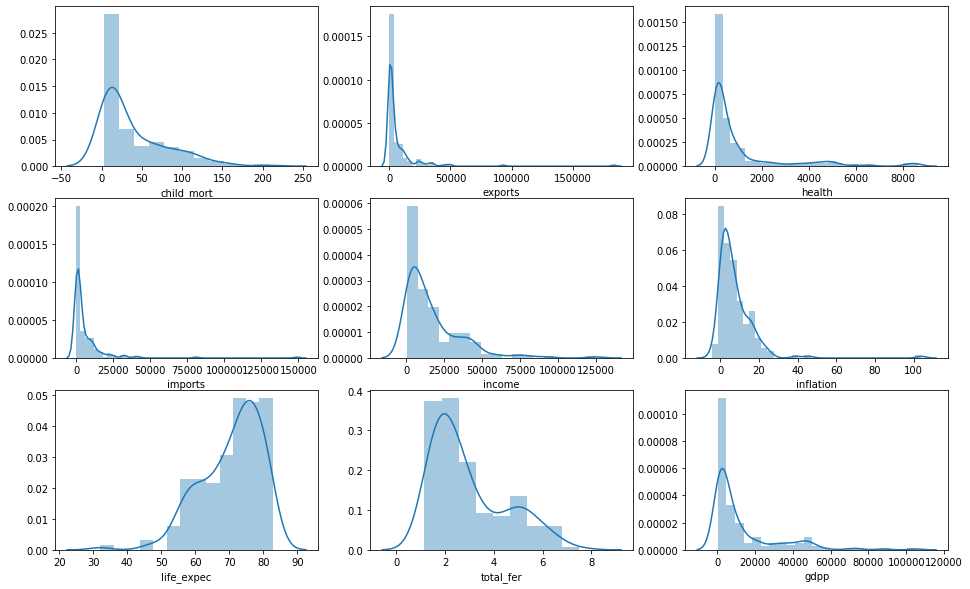

In [80]:
# Lets do some visualization

features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize =(16,10))

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

We can see in our visualization that income, child mortality and GDP can be used for cluster profiling as the data is not normally distributed and we can see some difference in values from the graphs.
As already mentioned in the problem statement we need to consider child mortality , GDP and Income for our cluster profiling

### Outlier Treatment

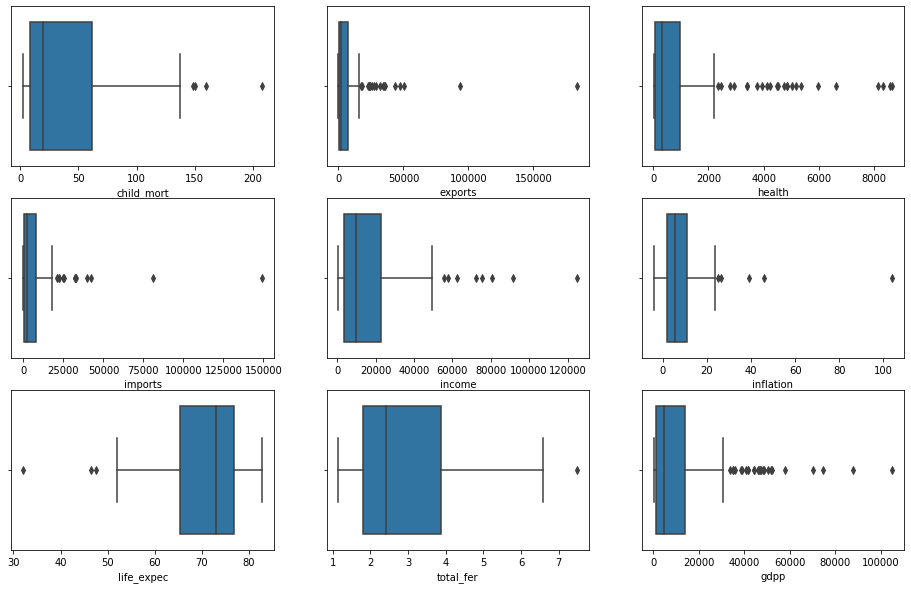

In [81]:
# Using boxplot visualization
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize =(16,10))

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

As we have only 167 rows so dropping the outliers would effect our analysis
We will not handle the lower end outliers as this would effect in choosing the correct countries for the need of aid.
We can do Capping of upper outliers but not for child mortality because high child mortality rate is also imp for clustering
We will be using 99th percentile for capping that is soft range cappping, this is chosen because we 
do not want to change my data very much
We will not be doing outlier treatment in life_expec as there is no upper outlier

In [82]:

q4_exports = df['exports'].quantile(0.99)
q4_health = df['health'].quantile(0.99)
q4_imports = df['imports'].quantile(0.99)
q4_income = df['income'].quantile(0.99)
q4_inflation = df['inflation'].quantile(0.99)
q4_total_fer = df['total_fer'].quantile(0.99)
q4_gdpp = df['gdpp'].quantile(0.99)


df['exports'][df['exports']>=q4_exports] = q4_exports
df['health'][df['health']>=q4_health] = q4_health
df['imports'][df['imports']>=q4_imports] = q4_imports
df['income'][df['income']>=q4_income] = q4_income
df['inflation'][df['inflation']>=q4_inflation] = q4_inflation
df['total_fer'][df['total_fer']>=q4_total_fer] = q4_total_fer
df['gdpp'][df['gdpp']>=q4_gdpp] = q4_gdpp


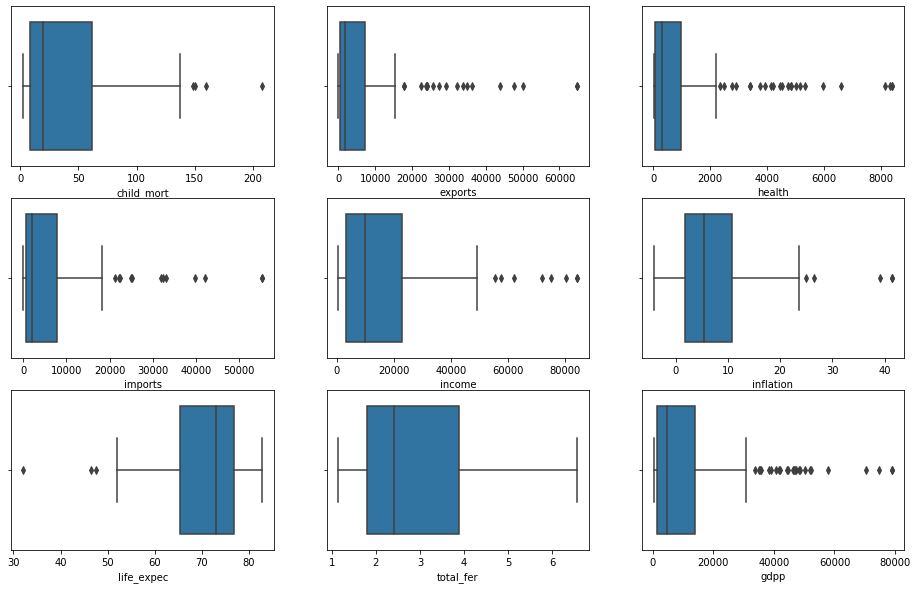

In [83]:
# Lets recheck for confirmation
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize =(16,10))

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

We can see here that there is decrease in the outliers ,
but the outliers still exists because we have chosen soft range for outlier treatment as we do not wanted to loose a lot of data

### Clustering

#### Hopkins Score

In [84]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [149]:
for i in range(10):
    print(hopkins(df.drop('country',axis =1)))

0.8942245990773661
0.9359250952988543
0.943750632595525
0.9169764071176271
0.9163805364186308
0.9569132146930938
0.8643315654792922
0.8869733026022676
0.8554131927333625
0.9058680476084712


In [86]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


As we can see that our hopkins score is around 90 after running 10 times which is very good for clustering, so anything above 80 is considered good for clustering

### Scaling

In [87]:
# We need to do scaling as all variable have different range of values
# So its always recomended to scale our numerical variables
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country',axis = 1))

In [88]:
df1=pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()
# Below is our scaled Data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


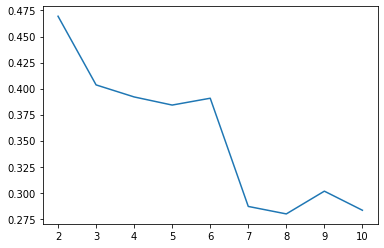

In [92]:
# Lets find out our k values using
# Silhouette Score
# Elbow Curve
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

As we can see that at k =2 we have the highest Silhouette Score
But it is always recomended to use value of K more than 2 so we can go we k=3
Lets check the ssd also

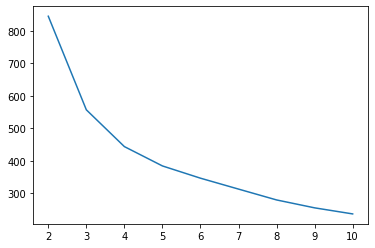

In [93]:
ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df1)
    ssd.append([k,kmeans.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

We can see k=3 is the best option here.
So from both the methods we come to a conclusion that k=3
will be the best option

In [94]:
# k=3
kmeans = KMeans(n_clusters=3, random_state =50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [98]:
# Lets see the labels
label = pd.DataFrame(kmeans.labels_,columns = ['label'])

In [100]:
df.kmeans= df.copy()
df.kmeans = pd.concat([df.kmeans,label], axis =1)

In [102]:
# Now we have the labels attached with our orginal data
df.kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [103]:
# Lets check the number of points in each clusters
df.kmeans.label.value_counts()

2    90
1    48
0    29
Name: label, dtype: int64

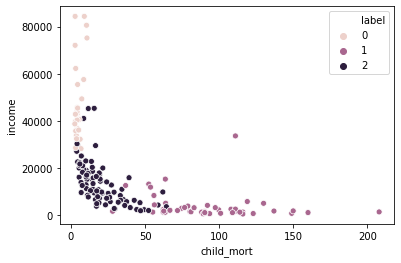

In [158]:
# The scatter plot using child mort and income shows some distinguish cluster
sns.scatterplot(x='child_mort',y='income', hue= 'label', data=df.kmeans)

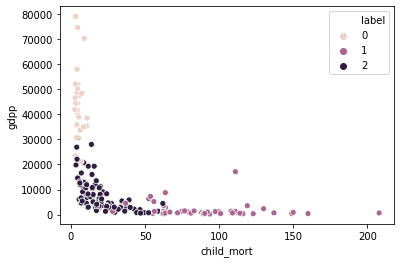

In [159]:
# Similarly scatter plot for child mort and GDPP also have pretty good difference
sns.scatterplot(x='child_mort',y='gdpp', hue= 'label', data=df.kmeans)

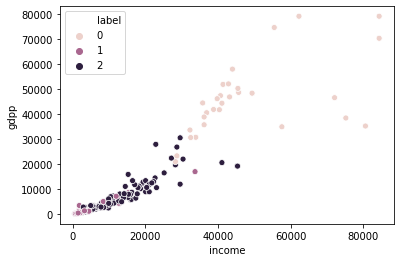

In [160]:
# Same is the case for income vs gdpp
sns.scatterplot(x='income',y='gdpp', hue= 'label', data=df.kmeans)

We can see that we have three cluster which are very distinguished from each other for 
1. *Child Mortality*
2. *Income*
3. *GDPP*

In [152]:
# CLuster Profiling using 
# Child Mortality,GDP and income
df.kmeans.drop('country',axis =1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,4.982759,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.479310,1.754138,46068.137931
1,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333
2,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778


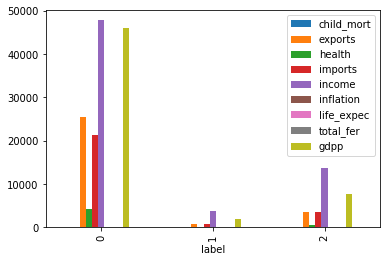

In [108]:
df.kmeans.drop('country',axis =1).groupby('label').mean().plot(kind='bar')

As we can see we cannot differentiate on the basis of all the columns so we need some important column , so in our case  Child Mortality,GDP and income are important

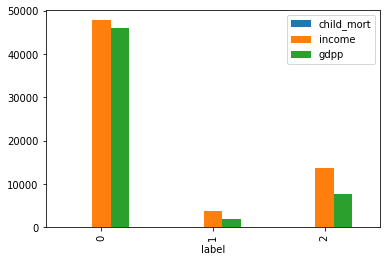

In [117]:
df.kmeans[['child_mort','income','gdpp','label']].groupby('label').mean().plot(kind = 'bar')

In [120]:
df.kmeans[['child_mort','income','gdpp','label']].groupby('label').mean()

,child_mort,income,gdpp
label,,,
0,4.982759,47784.413793,46068.137931
1,91.610417,3897.354167,1909.208333
2,20.547778,13804.333333,7808.577778


 We can see the graph was not very helpful so its better to go
 with groupby dataframe


**We can see the cluster 1 is the cluster with high child mortality , low income and low gdpp**

In [126]:
# Now lets filter the data for cluster 1
df.kmeans[df.kmeans['label']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,1
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,1
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,1
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,1


In [131]:
#Sorting the data 
df.kmeans[df.kmeans['label']==1].sort_values(by=['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,1


**We get above 5 countries using kmeans for high child mortality,low income and low gdpp**
1. Haiti
2. Sierra Leone	
3. Chad
4. Central African Republic
5. Mali

### Hierarchical Clustering

As we already have scaled data and we already checked the hopkins score so we do not need to repeat these steps

In [128]:
# Our Scaled Data which we will use for Hierarchical clustering
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


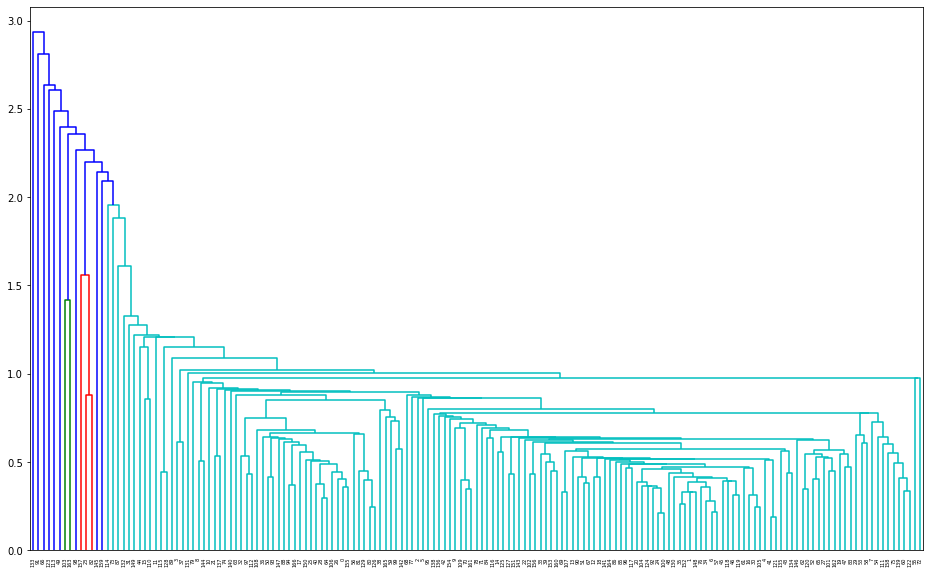

In [156]:
# Single Linkage
plt.figure(figsize = (16,10))
mergings = linkage(df1, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

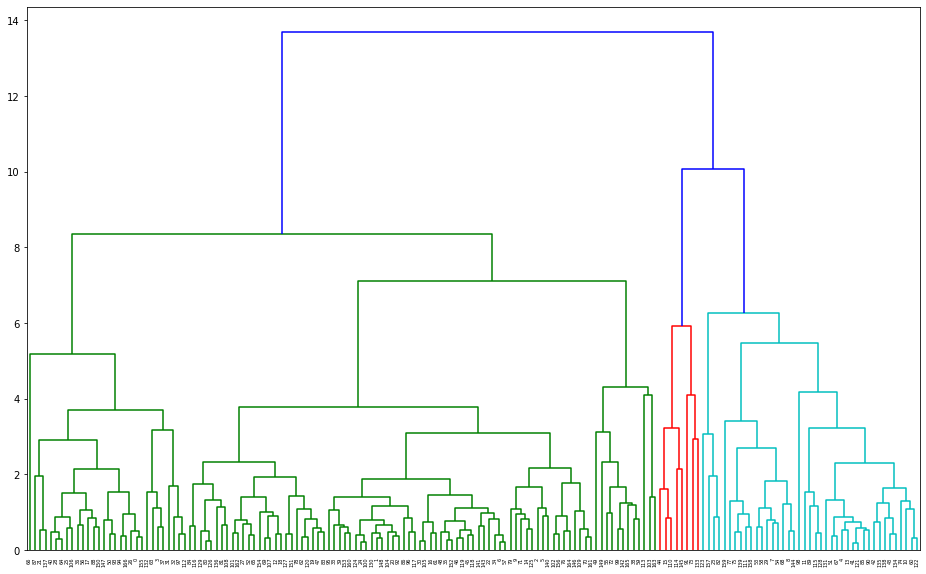

In [157]:
# complete Linkage
plt.figure(figsize = (16,10))
mergings = linkage(df1, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In the single linkage we can see that we might not be able to differentiate or decide the values of k 
But in complete linkage if we can choose threshold as 10 then we get three very distinct clusters

In [134]:
cluster = cut_tree(mergings,n_clusters = 3).reshape(-1,)

In [135]:
cluster

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [137]:
#lets make a copy of original Data
df_hierarchical = df.copy()

In [139]:
#Adding labels to the data
df_hierarchical['label'] = cluster

In [146]:
# Lets check the number of points in each clusters
df_hierarchical.label.value_counts()

0    118
1     41
2      8
Name: label, dtype: int64

**We can see below is the scatter plot clusters using hierarchical cluster.
One thing to notice is that the cluster are not equally distributed in each case
This means kmeans created better cluster for this dataset.**

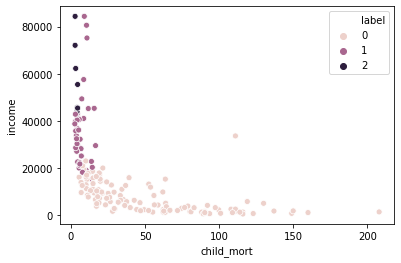

In [153]:
sns.scatterplot(x='child_mort',y='income', hue= 'label', data=df_hierarchical)

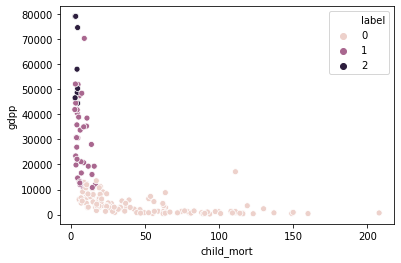

In [154]:
sns.scatterplot(x='child_mort',y='gdpp', hue= 'label', data=df_hierarchical)

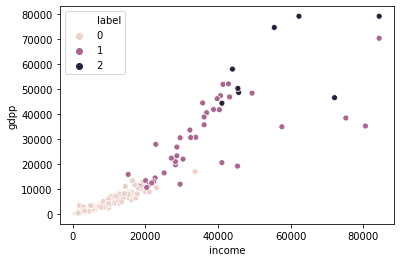

In [155]:
sns.scatterplot(x='income',y='gdpp', hue= 'label', data=df_hierarchical)

We can see that we have three cluster which are very distinguished from each other for 
1. *Child Mortality*
2. *Income*
3. *GDPP*

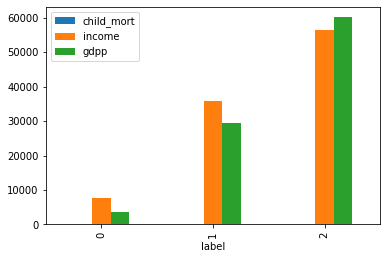

In [141]:
#Plotting our clusters
df_hierarchical[['child_mort','income','gdpp','label']].groupby('label').mean().plot(kind = 'bar')

In [143]:
#For better understanding viewing our data as a table
df_hierarchical[['child_mort','income','gdpp','label']].groupby('label').mean()

,child_mort,income,gdpp
label,,,
0,51.512712,7581.889831,3732.322034
1,6.878049,35853.024390,29492.682927
2,3.825000,56321.750000,60097.000000


**We can see the cluster 0 is the cluster with high child mortality , low income and low gdpp**

In [145]:
# Sorting our data according to the requirement
df_hierarchical[df_hierarchical['label']==0].sort_values(by=['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


### As we can see that we get the same countries with high child mortality,low income and low gdpp

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

### Accoring to our analysis the countries that require urgent aid are:

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali